# Data Clean Up with Titanic Data Set

## Introduction
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

Fewer than a third of those aboard Titanic survived the disaster. The figures show stark differences in the survival rates of the different classes aboard Titanic. Although only 3% of first-class women were lost, 54% of those in third class died. Similarly, five of six first-class and all second-class children survived, but 52 of the 79 in third class perished. The differences by gender were even bigger: nearly all female crew members, first and second class passengers were saved. Men from the First Class died at a higher rate than women from the Third Class. In total, 50% of the children survived, 20% of the men and 75% of the women.

Titanic's maiden voyage began on Wednesday, 10 April 1912. Following the embarkation of the crew the passengers began arriving at 9:30 a.m., 920 passengers boarded Titanic at Southampton. Additional passengers were to be picked up at Cherbourg and Queenstown.

In this case, students will load passenger information from 3 csv files, one for each port of embarkation; then merge them into one pandas DataFrame, clean up the data set and perform exploratory data analysis(EDA) on various factors that affect survival rate.


In [118]:
%%html
<style>
table {float:left}
</style>

## Data Set
There are 3 csv files that contain 891 passenger information. One for each port of embarkation, Southampton, Cherbourg and Queenstown.
- Titanic_Southampton.csv  
- Titanic_Cherbourg.csv  
- Titanic_Queenstown.csv

## Data Dictionary
| Column | Definition | Key         
|:-|:-|:-
|Name|Name|
|Sex|Gender|
|Birthday|Passenger birthday(fake)|
|Sibling Spouse|# of siblings / spouses aboard the Titanic|
|Parent Children|# of parents / children aboard the Titanic|
|Ticket|Ticket Number|
|Fare|Passenger Fare|
|Cabin|Cabin Number|
|Passenger Class|Ticket Class| 1 = 1st, 2 = 2nd, 3 = 3rd
|Survived| Survival  | 0 = No, 1 = Yes


## Load, Clean and Transform

### 1. Load Data
Load passenger information from 3 csv files which reside in current folder. 
Add a new column "Embarked" in each DataFrame, set value C for passengers boarded in Cherbourg, Q for Queenstown, S for Southampton.
Merge 3 DataFrame to one. Check column names in each file and rename columns before merge if necessary.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
df_c = pd.read_csv('Titanic_Cherbourg.csv')
df_c['Embarked'] = 'C'
df_c.head()


,Survived,Passenger Class,Name,Sex,Sibling Spouse,Parent Children,Ticket,Fare,Cabin,Birthday,Embarked
0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,"May 06, 1874",C
1,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,"Sep 14, 1898",C
2,1,3,"Masselmani, Mrs. Fatima",female,0,0,2649,7.2250,NaN,NaN,C
3,0,3,"Emir, Mr. Farred Chehab",male,0,0,2631,7.2250,NaN,NaN,C
4,0,1,"Uruchurtu, Don. Manuel E",male,0,0,PC 17601,27.7208,NaN,"Nov 17, 1872",C


In [4]:
df_q = pd.read_csv('Titanic_Queenstown.csv')
df_q['Embarked'] = 'Q'
df_q.head()

,Survived,Passenger Class,Name,Sex,Sibling Spouse,Parent Children,Ticket,Fare,Cabin,Birthday,Embarked
0,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,NaN,Q
1,0,3,"Rice, Master. Eugene",male,4,1,382652,29.1250,NaN,02.01.1911,Q
2,1,3,"McGowan, Miss. Anna ""Annie""",female,0,0,330923,8.0292,NaN,05.24.1897,Q
3,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,330959,7.8792,NaN,NaN,Q
4,1,3,"Glynn, Miss. Mary Agatha",female,0,0,335677,7.7500,NaN,NaN,Q


In [5]:
df_s = pd.read_csv('Titanic_Southampton.csv')
df_s['Embarked'] = 'S'
df_s.head()

,Survived,Passenger Class,Name,Gender,Sibling Spouse,Parent Children,Ticket,Fare,Cabin,Birthday,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,$7.25,NaN,1891-03-04,S
1,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,$7.925,NaN,1886-12-04,S
2,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,$53.1,C123,1878-02-15,S
3,0,3,"Allen, Mr. William Henry",male,0,0,373450,$8.05,NaN,1877-10-02,S
4,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,$51.8625,E46,1858-12-10,S


In [6]:
df_s = df_s.rename(columns={'Gender':'Sex'})
df_s.head()

,Survived,Passenger Class,Name,Sex,Sibling Spouse,Parent Children,Ticket,Fare,Cabin,Birthday,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,$7.25,NaN,1891-03-04,S
1,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,$7.925,NaN,1886-12-04,S
2,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,$53.1,C123,1878-02-15,S
3,0,3,"Allen, Mr. William Henry",male,0,0,373450,$8.05,NaN,1877-10-02,S
4,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,$51.8625,E46,1858-12-10,S


In [7]:
df = pd.concat([df_c, df_q, df_s], axis=0) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 643
Data columns (total 11 columns):
Survived           889 non-null int64
Passenger Class    889 non-null int64
Name               889 non-null object
Sex                889 non-null object
Sibling Spouse     889 non-null int64
Parent Children    889 non-null int64
Ticket             889 non-null object
Fare               889 non-null object
Cabin              202 non-null object
Birthday           712 non-null object
Embarked           889 non-null object
dtypes: int64(4), object(7)
memory usage: 83.3+ KB


### 2. Clean Up Data
1. Change column names.
    - Column names should not contain spaces. Inster of Passenger Class as column name, it should be PassengerClass or Passenger_Class.
    - Special characters(eg. $,&,%) should not be used in column names.
    - Column names should be descriptive.
2. Convert Fare to float
3. Convert Birthday to datetime(pd.to_dateitme may not work when there're various datetime format in the column)

In [9]:
df.columns

Index(['Survived', 'Passenger Class', 'Name', 'Sex', 'Sibling Spouse',
       'Parent Children', 'Ticket', 'Fare', 'Cabin', 'Birthday', 'Embarked'],
      dtype='object')

In [10]:
df.columns = ['Survived', 'PassengerClass', 'Name', 'Sex', 'SiblingSpouse',
       'ParentChildren', 'Ticket', 'Fare', 'Cabin', 'Birthday', 'Embarked']

In [11]:
df.Fare = df.Fare.str.replace('$', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 643
Data columns (total 11 columns):
Survived          889 non-null int64
PassengerClass    889 non-null int64
Name              889 non-null object
Sex               889 non-null object
SiblingSpouse     889 non-null int64
ParentChildren    889 non-null int64
Ticket            889 non-null object
Fare              644 non-null float64
Cabin             202 non-null object
Birthday          712 non-null object
Embarked          889 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 83.3+ KB


In [12]:
df.Birthday.unique()

array(['May 06, 1874', 'Sep 14, 1898', nan, 'Nov 17, 1872',
       'Nov 24, 1884', 'Oct 12, 1898', 'May 25, 1909', 'Mar 03, 1864',
       'Sep 29, 1847', 'Apr 22, 1884', 'Aug 23, 1890', 'May 03, 1886',
       'Jun 16, 1841', 'Sep 29, 1889', 'Dec 10, 1897', 'May 11, 1895',
       'Oct 03, 1888', 'Apr 06, 1880', 'Jan 18, 1901', 'Apr 24, 1879',
       'Apr 28, 1889', 'May 21, 1888', 'Feb 19, 1862', 'Jun 06, 1856',
       'Sep 04, 1862', 'Feb 19, 1869', 'Oct 15, 1854', 'Aug 09, 1867',
       'May 29, 1886', 'Apr 09, 1873', 'Jun 04, 1881', 'Oct 05, 1880',
       'May 26, 1882', 'May 02, 1883', 'Apr 11, 1878', 'Jul 07, 1875',
       'Nov 08, 1879', 'Apr 08, 1894', 'Aug 26, 1876', 'Jun 17, 1889',
       'Nov 22, 1862', 'Aug 03, 1895', 'Nov 03, 1882', 'May 17, 1882',
       'Mar 27, 1889', 'Apr 01, 1895', 'May 17, 1872', 'Nov 24, 1876',
       'Feb 03, 1897', 'Dec 27, 1871', 'Sep 29, 1897', 'Feb 23, 1884',
       'Jan 08, 1868', 'Aug 15, 1852', 'Jun 12, 1888', 'Jul 01, 1887',
       'Jan 16, 1

In [13]:
def get_date(date_str):
    try:
        #1908-09-22
        return datetime.strptime(date_str, '%Y-%m-%d')
    except:
        pass
    try:
        #May 06, 1874
        return datetime.strptime(date_str, '%m.%d.%Y')
    except:
        pass
    try:
        #12.28.1882
        return datetime.strptime(date_str, '%b %d, %Y')
    except:
        pass
    if not np.isnan(date_str):
        print (date_str)

In [14]:
df['bd'] = df.Birthday.apply(lambda x:get_date(x))
df.sample(10)

,Survived,PassengerClass,Name,Sex,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Birthday,Embarked,bd
158,0,3,"Markoff, Mr. Marin",male,0,0,349213,NaN,NaN,"Oct 15, 1877",C,1877-10-15
261,0,3,"Beavan, Mr. William Thomas",male,0,0,323951,8.0500,NaN,1893-07-17,S,1893-07-17
59,1,1,"Ryerson, Miss. Emily Borie",female,2,2,PC 17608,NaN,B57 B59 B63 B66,"Apr 01, 1895",C,1895-04-01
86,1,2,"Webber, Miss. Susan",female,0,0,27267,13.0000,E101,1880-02-22,S,1880-02-22
540,1,2,"Wells, Miss. Joan",female,1,1,29103,23.0000,NaN,1909-04-02,S,1909-04-02
209,0,3,"Naidenoff, Mr. Penko",male,0,0,349206,7.8958,NaN,1890-10-19,S,1890-10-19
551,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,0,0,SOTON/O2 3101272,7.1250,NaN,1871-12-08,S,1871-12-08
256,0,2,"Funk, Miss. Annie Clemmer",female,0,0,237671,13.0000,NaN,1875-01-22,S,1875-01-22
121,1,1,"Stahelin-Maeglin, Dr. Max",male,0,0,13214,NaN,B50,"Aug 16, 1880",C,1880-08-16
314,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,0,0,C.A. 18723,10.5000,NaN,1881-06-08,S,1881-06-08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 643
Data columns (total 12 columns):
Survived          889 non-null int64
PassengerClass    889 non-null int64
Name              889 non-null object
Sex               889 non-null object
SiblingSpouse     889 non-null int64
ParentChildren    889 non-null int64
Ticket            889 non-null object
Fare              644 non-null float64
Cabin             202 non-null object
Birthday          712 non-null object
Embarked          889 non-null object
bd                712 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 90.3+ KB


In [16]:
df.drop?

In [17]:
df.Birthday = df.bd
df.drop(columns=['bd'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 643
Data columns (total 11 columns):
Survived          889 non-null int64
PassengerClass    889 non-null int64
Name              889 non-null object
Sex               889 non-null object
SiblingSpouse     889 non-null int64
ParentChildren    889 non-null int64
Ticket            889 non-null object
Fare              644 non-null float64
Cabin             202 non-null object
Birthday          712 non-null datetime64[ns]
Embarked          889 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 83.3+ KB


### 3. Feature Engineering
Create Age columns in the DataFrame. Calculate passenger age based on Birthday. Round age to 1 decimal place.

In [18]:
df['Age'] = df.Birthday.apply(lambda x: round((datetime(1912, 4, 15)-x).days/365,1))

### 4. Deal with Missing Values in Age Column
There are 177 out of 889 passengers don't have birthday information. Simply dropping passengers without age is a not good practice since significant information will be lost. Here we will fill missing age with estimations. A simply estimation is the mean age of all passengers. But we can improve the accuracy of estimation by using information in passenger name. All passenger names are in "First, Title. Last" format. We will extract title from name and create Title column. Then use mean age of corresponding title to fill missing ages.
1. Create Title Column, extra value from Name
2. Convert Title to all upper case
3. Fill missing Age with mean age of passengers with same title.

In [19]:
"Minahan, Dr. William Edward".split(',')[1].split()[0]

'Dr.'

In [20]:
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split()[0])
df.sample(5)

,Survived,PassengerClass,Name,Sex,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Birthday,Embarked,Age,Title
1,0,3,"Rice, Master. Eugene",male,4,1,382652,NaN,NaN,1911-02-01,Q,1.2,Master.
269,0,3,"Goodwin, Master. Sidney Leonard",male,5,2,CA 2144,46.9,NaN,1912-03-09,S,0.1,Master.
373,1,2,"Lemore, Mrs. (Amelia Milley)",female,0,0,C.A. 34260,10.5,F33,1878-05-03,S,34.0,Mrs.
491,0,2,"Brown, Mr. Thomas William Solomon",male,1,1,29750,39.0,NaN,1852-07-03,S,59.8,Mr.
123,0,1,"Van der hoef, Mr. Wyckoff",male,0,0,111240,33.5,B19,1851-09-13,S,60.6,Mr.


In [21]:
df.Title = df.Title.str.upper()
df.sample()

,Survived,PassengerClass,Name,Sex,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Birthday,Embarked,Age,Title
72,0,1,"Ringhini, Mr. Sante",male,0,0,PC 17760,NaN,NaN,1891-01-16,C,21.3,MR.


In [22]:
age_dict = df.groupby('Title').Age.mean().to_dict()
age_dict

{'CAPT.': 69.5,
 'COL.': 57.6,
 'DON.': 39.4,
 'DR.': 41.71666666666667,
 'JONKHEER.': 37.1,
 'LADY.': 47.7,
 'MAJOR.': 47.8,
 'MASTER.': 4.094444444444445,
 'MISS.': 21.17931034482759,
 'MLLE.': 23.7,
 'MME.': 23.9,
 'MR.': 31.884673366834164,
 'MRS.': 35.171028037383195,
 'MS.': 27.3,
 'REV.': 42.833333333333336,
 'SIR.': 48.1,
 'THE': 32.5}

In [23]:
df.Age = df.apply(lambda x: age_dict[x.Title] if np.isnan(x.Age) else x.Age, axis=1)
df.sample(10)

,Survived,PassengerClass,Name,Sex,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Birthday,Embarked,Age,Title
70,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,0,0,349215,7.8958,NaN,NaT,S,31.884673,MR.
38,1,3,"Albimona, Mr. Nassef Cassem",male,0,0,2699,NaN,NaN,1886-05-29,C,25.900000,MR.
470,0,2,"Eitemiller, Mr. George Floyd",male,0,0,29751,13.0000,NaN,1889-12-21,S,22.300000,MR.
270,1,2,"Buss, Miss. Kate",female,0,0,27849,13.0000,NaN,1876-07-05,S,35.800000,MISS.
117,0,3,"Panula, Master. Eino Viljami",male,4,1,3101295,39.6875,NaN,1911-05-09,S,0.900000,MASTER.
596,1,3,"Lulic, Mr. Nikola",male,0,0,315098,8.6625,NaN,1885-09-22,S,26.600000,MR.
180,1,1,"Beckwith, Mr. Richard Leonard",male,1,1,11751,52.5542,D35,1876-04-03,S,36.100000,MR.
22,0,2,"Wheadon, Mr. Edward H",male,0,0,C.A. 24579,10.5000,NaN,1846-09-21,S,65.600000,MR.
58,0,3,"Slocovski, Mr. Selman Francis",male,0,0,SOTON/OQ 392086,8.0500,NaN,NaT,S,31.884673,MR.
472,0,1,"Colley, Mr. Edward Pomeroy",male,0,0,5727,25.5875,E58,1865-05-19,S,46.900000,MR.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 643
Data columns (total 13 columns):
Survived          889 non-null int64
PassengerClass    889 non-null int64
Name              889 non-null object
Sex               889 non-null object
SiblingSpouse     889 non-null int64
ParentChildren    889 non-null int64
Ticket            889 non-null object
Fare              644 non-null float64
Cabin             202 non-null object
Birthday          712 non-null datetime64[ns]
Embarked          889 non-null object
Age               889 non-null float64
Title             889 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 97.2+ KB


## Exploratory Data Analysis (EDA)
We will explore the impact on survival of gender, age and passenger class.

### 1. Overall Survival Rate
Plot a bar chart for survived and perished.

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

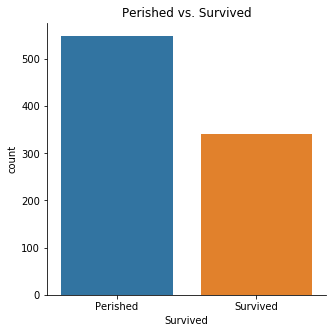

In [48]:
f,ax=plt.subplots(figsize=(5,5))
sns.countplot('Survived',data=df, ax=ax)
ax.set_title('Perished vs. Survived')
plt.xticks([0, 1], ['Perished', 'Survived'])
sns.despine()

In [86]:
df.Survived.mean()

0.38245219347581555

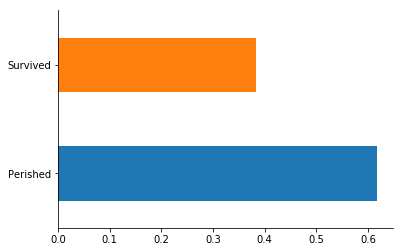

In [51]:
#counts of survived
survived_counts = df.Survived.value_counts(normalize=True)
survived_counts.plot.barh()
plt.yticks([0, 1], ['Perished', 'Survived'])
sns.despine()

### 2. Gender and Survival Rate
Find survival rate for male and female. Plot the result.

In [55]:
df.groupby(by=['Sex'], as_index=False).agg({'Survived':'mean'}).rename(columns={'Survived':'SurvivalRate'})

,Sex,SurvivalRate
0,female,0.740385
1,male,0.188908


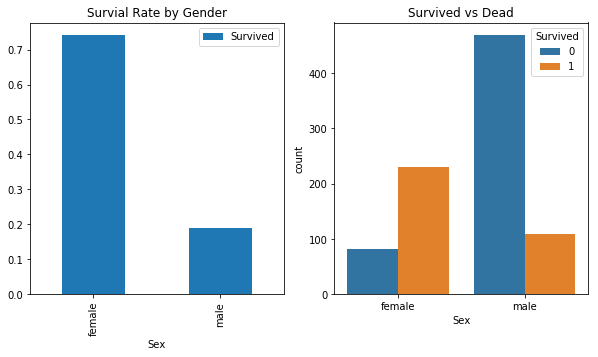

In [59]:
#bar plot and seaborn countplot
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survial Rate by Gender')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived vs Dead')
plt.show()

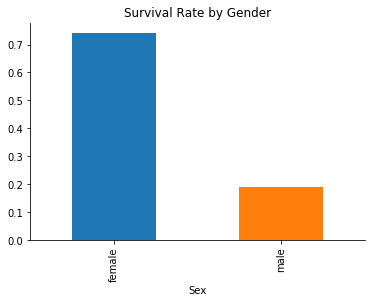

In [73]:
df.groupby('Sex').Survived.mean().plot.bar()
plt.title('Survival Rate by Gender')
sns.despine()

### 3. Age and Survival Rate
1. Plot histogram for passenger age distribution.
2. Create new column AgeBin, with values :
- '0-5'
- '6-10'
- '11-15'
- '16-20'
- '21-30'
- '31-40'
- '41-50'
- '51-90'

Text(0, 0.5, 'Count')

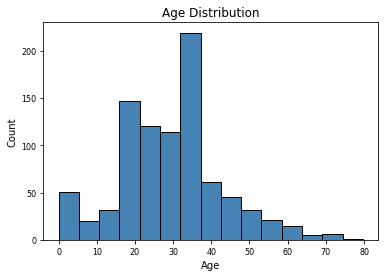

In [61]:
ax = df.Age.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

In [63]:
df['AgeBin'] = pd.cut(df.Age, [0, 5, 10, 15, 20, 30, 40, 50, 90])
df.head()

,Survived,PassengerClass,Name,Sex,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Birthday,Embarked,Age,Title,AgeBin
0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,NaN,C85,1874-05-06,C,38.000000,MRS.,"(30, 40]"
1,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,NaN,NaN,1898-09-14,C,13.600000,MRS.,"(10, 15]"
2,1,3,"Masselmani, Mrs. Fatima",female,0,0,2649,NaN,NaN,NaT,C,35.171028,MRS.,"(30, 40]"
3,0,3,"Emir, Mr. Farred Chehab",male,0,0,2631,NaN,NaN,NaT,C,31.884673,MR.,"(30, 40]"
4,0,1,"Uruchurtu, Don. Manuel E",male,0,0,PC 17601,NaN,NaN,1872-11-17,C,39.400000,DON.,"(30, 40]"


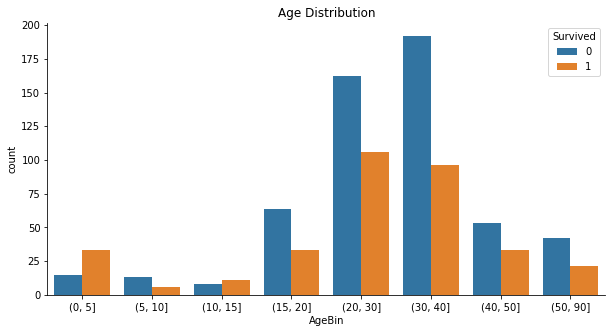

In [66]:
f,ax=plt.subplots(figsize=(10,5))
sns.countplot('AgeBin', hue='Survived', data=df, ax=ax)
ax.set_title('Age Distribution')
#plt.xticks([0, 1], ['Perished', 'Survived'])
sns.despine()

In [68]:
age_survive_rate = df.groupby('AgeBin').agg({'Survived':'mean'})
age_survive_rate

,Survived
AgeBin,
"(0, 5]",0.687500
"(5, 10]",0.315789
"(10, 15]",0.578947
"(15, 20]",0.340206
"(20, 30]",0.395522
"(30, 40]",0.333333
"(40, 50]",0.383721
"(50, 90]",0.333333


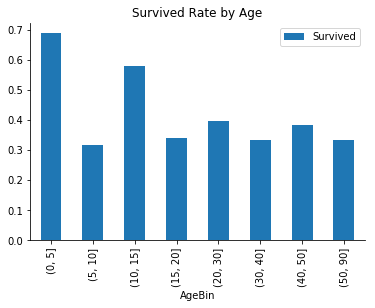

In [71]:
age_survive_rate.plot.bar()
plt.title('Survived Rate by Age')
sns.despine()

### 3. Survival Rate by Passenger Class
Plot survival rate for each passenger class.

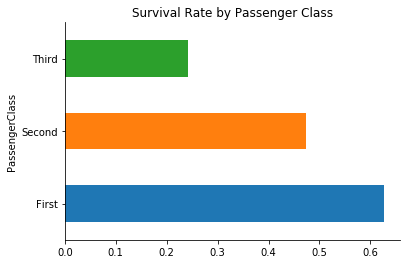

In [79]:
df.groupby('PassengerClass').Survived.mean().plot.barh()
plt.title('Survival Rate by Passenger Class')
plt.yticks([0,1,2], ['First', 'Second', 'Third'])
sns.despine()

### 4. Survival Rate by Embarkation
Find survival rate of passengers embarked from different port. Passengers from which port have highest and lowest survival rate? Try explain the difference in survival rate.

**Conclusion**  
Passengers embarked in Cherbourg have highest survival rate;  
Passengers embarked in Southampton have lowest survival rate;  

The reason is Cherbourg passengers have higher percent of female and 1st class passengers.



In [90]:
df.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [91]:
df.groupby('Embarked').Survived.count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

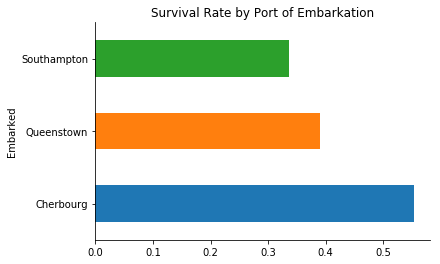

In [94]:
df.groupby('Embarked').Survived.mean().plot.barh()
plt.title('Survival Rate by Port of Embarkation')
plt.yticks([0, 1, 2], ['Cherbourg', 'Queenstown','Southampton'])
sns.despine()

In [88]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

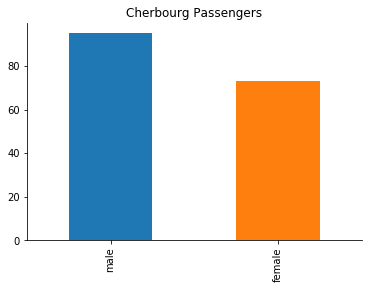

In [99]:
df[df.Embarked=='C'].Sex.value_counts().plot.bar()
plt.title('Cherbourg Passengers')
sns.despine()

In [ ]:
df[df.Embarked=='C'].PassengerClass.value_counts

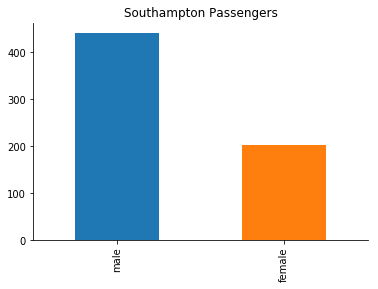

In [100]:
df[df.Embarked=='S'].Sex.value_counts().plot.bar()
plt.title('Southampton Passengers')
sns.despine()

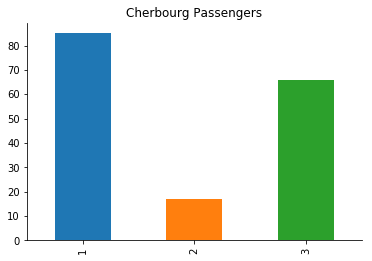

In [104]:
df[df.Embarked=='C'].PassengerClass.value_counts(sort=False).plot.bar()
plt.title('Cherbourg Passengers')
sns.despine()

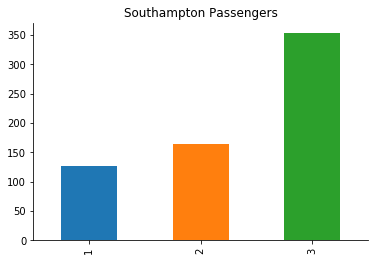

In [119]:
df[df.Embarked=='S'].PassengerClass.value_counts(sort=False).plot.bar()
plt.title('Southampton Passengers')
sns.despine()

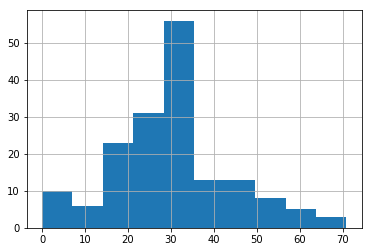

In [107]:
df[df.Embarked=='C'].Age.hist()

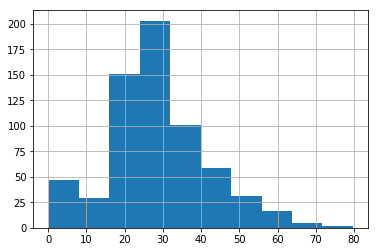

In [108]:
df[df.Embarked=='S'].Age.hist()

### Verify Women First Code
Compare survival rate of male passengers in first class and female passengers in 3rd class. Does women first still hold across different passenger class?

In [121]:
df[(df.PassengerClass==1)&(df.Sex=='male')].Survived.mean()

0.36885245901639346

In [122]:
df[(df.PassengerClass==3)&(df.Sex=='female')].Survived.mean()

0.5